# Multiple Linear Regression(House price prediction)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [10]:
df.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
df.shape

(21613, 21)

In [35]:
columns_to_drop = ['zipcode', 'lat']
df1 = df1.drop(columns=columns_to_drop, axis=1)

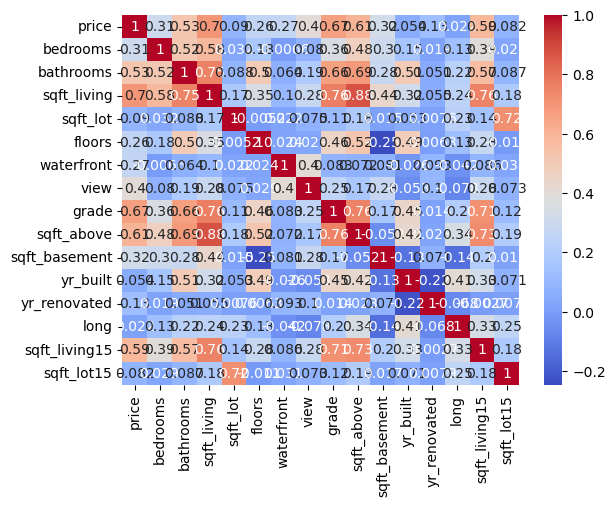

In [36]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [13]:
df1=df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","grade","sqft_above",
        "sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]]

In [14]:
print(df1.corr)

<bound method DataFrame.corr of           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  grade  sqft_above  sqft_basement  yr_built  \
0               0     0      7        1180  

In [15]:
X=df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","grade","sqft_above",
        "sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]]
Y=df["price"]

# Exploratory Data Analysis

In [16]:
# Distribution of the target variable

C:\Users\Admin\AppData\Local\Temp\ipykernel_10484\1702197777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"]);


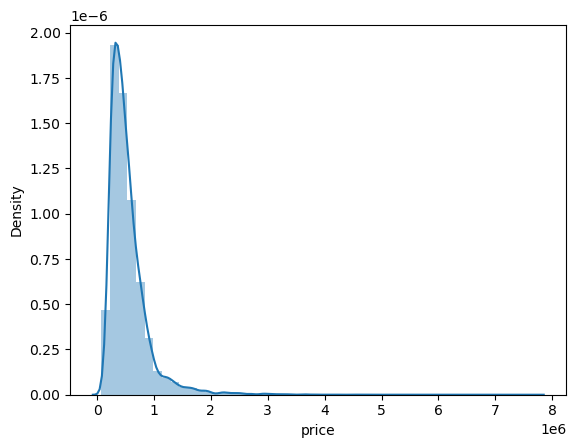

In [17]:
sns.distplot(df["price"]);

In [18]:
# Relationship of Price with other variables

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


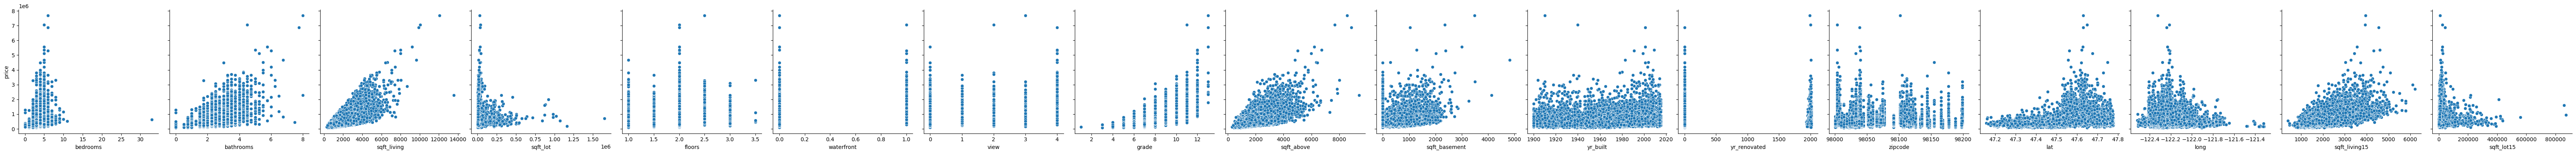

In [19]:
sns.pairplot(df, x_vars=["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","grade","sqft_above",
        "sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"],
             y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()

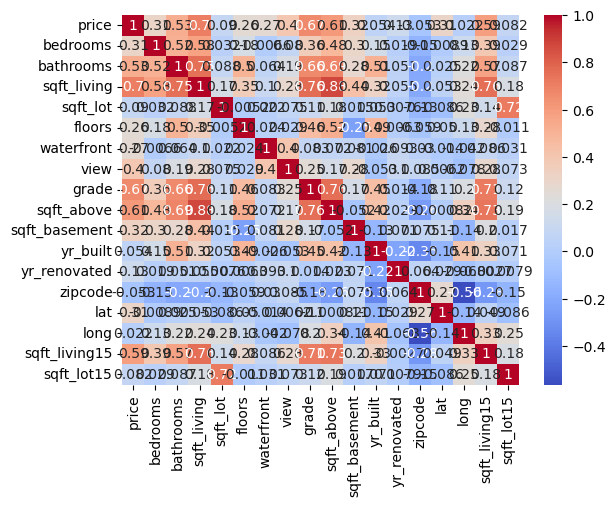

In [20]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [39]:
correlations=df1.corr()
correlations["price"]

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [21]:
correlations=df1.corr()
correlations["price"]

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

# Model Building

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size =0.5)

In [23]:
y_train.shape

(10806,)

In [24]:
y_test.shape

(10807,)

In [25]:
reg_model = linear_model.LinearRegression()

In [26]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(x_train, y_train)

In [27]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  14308706.658876384


[('bedrooms', -31858.226534488556),
 ('bathrooms', 46310.60537338766),
 ('sqft_living', 102.14401842467235),
 ('sqft_lot', 0.12152172437841408),
 ('floors', 3148.8320086531817),
 ('waterfront', 668537.8327397377),
 ('view', 53547.801548229894),
 ('grade', 100214.11693534476),
 ('sqft_above', 60.03362467232027),
 ('sqft_basement', 42.11039359633305),
 ('yr_built', -2888.340570339732),
 ('yr_renovated', 18.076318249405688),
 ('zipcode', -650.7266158500079),
 ('lat', 599629.6056801801),
 ('long', -213251.44208867973),
 ('sqft_living15', 27.778298031091015),
 ('sqft_lot15', -0.30130929642229176)]

In [29]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(x_test)  
x_pred= reg_model.predict(x_train) 

In [30]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 352509.79571278  496438.87884616  798280.03372153 ... 1378883.94564072
  275386.50425356  362837.05691915]


In [31]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
499,437500.0,3.525098e+05
4313,430000.0,4.964389e+05
14762,530000.0,7.982800e+05
17683,599000.0,6.365579e+05
17619,451000.0,6.214473e+05
...,...,...
14266,400000.0,3.687315e+05
8238,585000.0,6.044491e+05
21530,3000000.0,1.378884e+06
14733,308500.0,2.753865e+05


In [32]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 127234.43697225934
Mean Square Error: 41730929170.88372
Root Mean Square Error: 204281.49493011774
